
Using the MNIST dataset to prepare the Tensorflow Developer Certification by Google.

---





In [107]:
#First step is import the libraries. 
import tensorflow as tf
#Numpy is a lybrary that allow us to work with arrays. 
import numpy as np
#keras is an open source neural networks lybrary writted in python that run's in varios frameworks, TensorFlow included. 
from tensorflow import keras
from time import time

gEpochs = 30

print (tf.__version__)


2.8.2


In [108]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo-', label='Training accuracy')
  plt.plot(epochs, val_acc, 'go-', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo-', label='Training Loss')
  plt.plot(epochs, val_loss, 'go-', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [109]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
# Load the training and test split of the Fashion MNIST dataset
(x_train, y_train), (x_val, y_val) = fmnist.load_data()
# Normalize the pixel values of the train and test images
x_train  = x_train / 255.0
x_val = x_val / 255.0


In [110]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!")               
                # Stop training once the above condition is met
                self.model.stop_training = True

callbacks = myCallback()

#FIRST SIMPLE MODEL

In [111]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28, 28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [112]:
    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 

In [113]:
    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history = model.fit(x_train, 
                        y_train, 
                        epochs=gEpochs, 
                        validation_data = (x_val, y_val), 
                        callbacks=callbacks)
    model.evaluate(x_val, y_val)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4925 - accuracy: 0.8277 - val_loss: 0.4249 - val_accuracy: 0.8490
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8663 - val_loss: 0.3901 - val_accuracy: 0.8605
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3340 - accuracy: 0.8770 - val_loss: 0.3725 - val_accuracy: 0.8659
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8844 - val_loss: 0.3560 - val_accuracy: 0.8688
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.8914 - val_loss: 0.3411 - val_accuracy: 0.8771
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2787 - accuracy: 0.8968 - val_loss: 0.3525 - val_accuracy: 0.8746
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2655 - accuracy: 0.9013 - val_loss: 0.3406 - val_accuracy:

[0.41999736428260803, 0.8823999762535095]

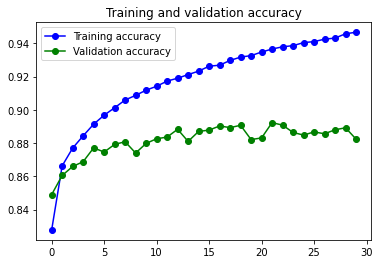

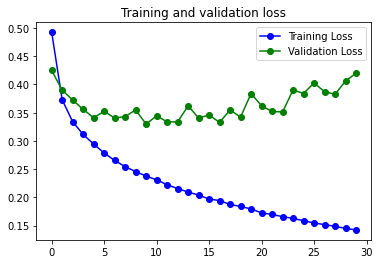

In [114]:
plot_loss_acc(history)

This first simple model accieve good numbers in loos and accuracy, but only eith the training data. We can observe that we have a lor of overfiting. 
When we test the model with validation data, the los is soi much big, and the accuracy is 10 points lower. 

#Convolutional Model 

In [115]:
from tensorflow.python.ops.nn_ops import dropout
#compile the dropout models 
from tensorflow.keras.optimizers import RMSprop
# Define the model
model2 = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  #tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer=RMSprop(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 

In [116]:
    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history2 = model2.fit(x_train, 
                        y_train, 
                        epochs=gEpochs, 
                        validation_data = (x_val, y_val),
                        callbacks=callbacks)
    
    model2.evaluate(x_val, y_val)

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4782 - accuracy: 0.8257 - val_loss: 0.3893 - val_accuracy: 0.8576
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3119 - accuracy: 0.8861 - val_loss: 0.3092 - val_accuracy: 0.8867
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2703 - accuracy: 0.9030 - val_loss: 0.3000 - val_accuracy: 0.8972
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2455 - accuracy: 0.9107 - val_loss: 0.2762 - val_accuracy: 0.8998
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2278 - accuracy: 0.9180 - val_loss: 0.2755 - val_accuracy: 0.9049
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2176 - accuracy: 0.9216 - val_loss: 0.2669 - val_accuracy: 0.9050
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2062 - accuracy: 0.9255 - val_loss: 0.2999 - val_accuracy:

[0.45598363876342773, 0.8902000188827515]

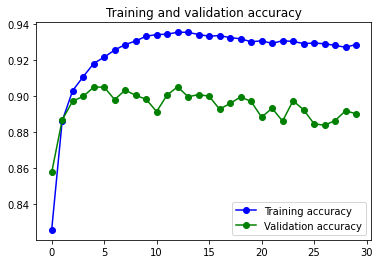

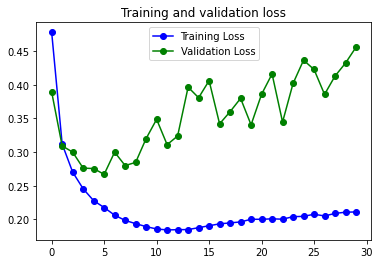

In [117]:
plot_loss_acc(history2)

With convolutional model we get better numbers with the validate data than with the simpler model. 

**Validation data:**

-Loss: 02946

-Accuracy: 08959



**Training Data after 10 epochs:**

-Loss: 02496

-Accuracy: 08959

No sings of overffing, at last in this 10 epoch. 

#Convolutional Model with MaxPooling and Dropout to avoid overfitting

In [118]:
from tensorflow.python.ops.nn_ops import dropout
# Build the classification model
model3 = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 

    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
history3 = model3.fit(x_train, 
                        y_train, 
                        epochs=gEpochs,
                        validation_data = (x_val, y_val), 
                        callbacks=callbacks)
    
model3.evaluate(x_val, y_val)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5419 - accuracy: 0.8008 - val_loss: 0.3839 - val_accuracy: 0.8645
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3784 - accuracy: 0.8616 - val_loss: 0.3223 - val_accuracy: 0.8848
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3382 - accuracy: 0.8745 - val_loss: 0.2895 - val_accuracy: 0.8952
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3145 - accuracy: 0.8826 - val_loss: 0.2991 - val_accuracy: 0.8908
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2976 - accuracy: 0.8890 - val_loss: 0.2799 - val_accuracy: 0.8966
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2866 - accuracy: 0.8932 - val_loss: 0.2815 - val_accuracy: 0.8964
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2755 - accuracy: 0.8963 - val_loss: 0.2741 - val_accuracy:

[0.23848557472229004, 0.9146000146865845]

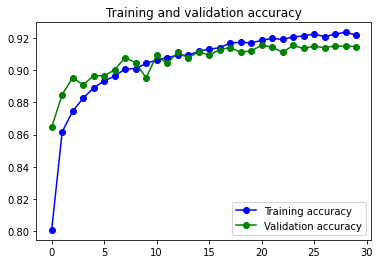

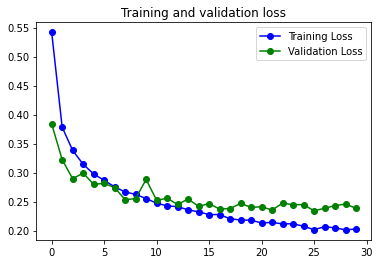

In [119]:
plot_loss_acc(history3)

In [120]:
from tensorflow.python.ops.nn_ops import dropout
# Build the classification model
model4 = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (5,5), strides=2, activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (5,5), strides=2, activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 

    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
history4 = model4.fit(x_train, 
                        y_train, 
                        epochs=gEpochs, 
                        validation_data = (x_val, y_val), 
                        callbacks=callbacks)
    
model4.evaluate(x_val, y_val)


Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5594 - accuracy: 0.7992 - val_loss: 0.3396 - val_accuracy: 0.8749
Epoch 2/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3568 - accuracy: 0.8710 - val_loss: 0.2996 - val_accuracy: 0.8909
Epoch 3/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3132 - accuracy: 0.8899 - val_loss: 0.2797 - val_accuracy: 0.8981
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2844 - accuracy: 0.8977 - val_loss: 0.2647 - val_accuracy: 0.9043
Epoch 5/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2619 - accuracy: 0.9057 - val_loss: 0.2462 - val_accuracy: 0.9084
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2488 - accuracy: 0.9095 - val_loss: 0.2234 - val_accuracy: 0.9194
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2303 - accuracy: 0.9176 - val_loss: 0.2342 - val_ac

[0.23307804763317108, 0.9276000261306763]

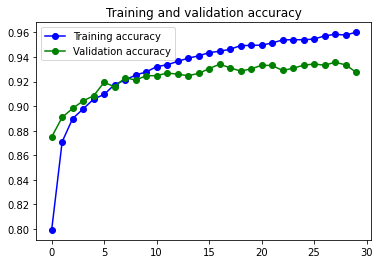

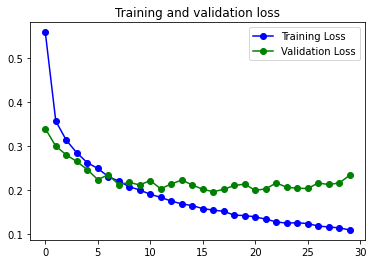

In [121]:
plot_loss_acc(history4)